<center>
<h1><u><b>Klasifikasi Naive Bayes</b></u></h1>
<h2><b>Case: animes.csv</b></h2>

</center>

-----

<div style="text-align: right;">
<h3>Kelompok 3 (DeMiner)</h3>
</div>



Disini kami akan mengklasifikasikan data animes.csv dengan menerapkan algoritma Naive Bayes. Maka dari itu kami akan melakukan beberapa langkah:
1. Eksplorasi Data
2. Preprocessing Data
3. Visualisasi Data (Scatterplot)
4. Hasil performa algoritma, meliputi Accuracy, Precision, dan Recall 

Untuk tema kali ini adalah:

<span style="background-color: lightgrey;">Apakah anime X merupakan salah satu dari 100 anime terpopuler atau tidak?</span>

## Eksplorasi Data
-----

In [1]:
import numpy as np
import pandas as pd

In [2]:
anime = pd.read_csv('../src/animes.csv')
anime.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [3]:
anime.describe()

,uid,episodes,members,popularity,ranked,score
count,19311.000000,18605.000000,1.931100e+04,19311.000000,16099.000000,18732.000000
mean,19358.904096,11.460414,3.472609e+04,7720.830304,6866.524194,6.436107
std,14271.446515,47.950386,1.121772e+05,4676.786104,4390.018768,1.007941
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,4833.500000,1.000000,3.880000e+02,3725.000000,2895.500000,5.770000
50%,18327.000000,2.000000,2.389000e+03,7539.000000,6963.000000,6.410000
75%,33896.500000,12.000000,1.450150e+04,11613.000000,10601.500000,7.150000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [5]:
anime.shape

(19311, 12)

## Preprocessing Data
-----

Dari hasil eksplorasi data, terlhat bahwa img_url dan link tidak akan cocok digunakan untuk train model.

In [6]:
anime.drop(columns=['img_url', 'link'], inplace=True)

Kemudian drop baris data yang mengalami duplikat.

In [7]:
anime.drop_duplicates(inplace=True)
anime.shape

(16368, 10)

Kemudian drop baris data yang terdapat Null/NaN untuk kolom/fitur episodes, title, synopsis, genre, aired, dan ranked.

In [8]:
anime.dropna(subset=['episodes', 'title', 'synopsis', 'genre', 'aired', 'ranked'], inplace=True)
anime.shape

(13854, 10)

Cek apakaha masih terdapat Null atau tidak.

In [9]:
anime.isnull().sum()

uid           0
title         0
synopsis      0
genre         0
aired         0
episodes      0
members       0
popularity    0
ranked        0
score         0
dtype: int64

Kemudian mengklasifikasikan data anime yang populer di 100 besar dengan nilai boolean.

In [10]:
anime['is_popular'] = anime['popularity'] <= 100
anime['is_popular'].value_counts()

is_popular
False    13755
True        99
Name: count, dtype: int64

Setelah di pikir secara logika, kolom uid, title, synopsis, dan aired tidak relevan dengan popularitas

In [11]:
anime.drop(columns=['uid', 'title', 'synopsis', 'aired'], inplace=True)
anime.head()

,genre,episodes,members,popularity,ranked,score,is_popular
0,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",25.0,489888,141,25.0,8.82,False
1,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",22.0,995473,28,24.0,8.83,True
2,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",13.0,581663,98,23.0,8.83,True
3,"['Action', 'Military', 'Adventure', 'Comedy', ...",64.0,1615084,4,1.0,9.23,True
4,"['Action', 'Mystery', 'Supernatural', 'Vampire']",1.0,214621,502,22.0,8.83,False


Karena genre merupakan sekumpulan data, maka diambil genre pertamanya dan transform dengan LabelEncoder. 

In [12]:
anime['genre'].str.strip("[]").str.split(",").str[0].str.replace("'", "").str.strip()

0               Comedy
1                Drama
2               Sci-Fi
3               Action
4               Action
             ...      
19002           Action
19003    Slice of Life
19004    Slice of Life
19005           Action
19006           Comedy
Name: genre, Length: 13854, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
anime['genre'] = le.fit_transform(anime['genre'])
anime.head()


,genre,episodes,members,popularity,ranked,score,is_popular
0,2732,25.0,489888,141,25.0,8.82,False
1,2962,22.0,995473,28,24.0,8.83,True
2,4042,13.0,581663,98,23.0,8.83,True
3,1109,64.0,1615084,4,1.0,9.23,True
4,1245,1.0,214621,502,22.0,8.83,False


## Visualisasi Data
-----

Untuk memvisualisasikan data, kita harus melihat korelasi antar fitur/kolom.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
anime.corr()

,genre,episodes,members,popularity,ranked,score,is_popular
genre,1.000000,-0.043015,-0.130883,0.301912,0.268689,-0.236994,-0.054597
episodes,-0.043015,1.000000,0.054212,-0.038158,-0.056384,0.067698,0.041878
members,-0.130883,0.054212,1.000000,-0.452306,-0.389635,0.402495,0.721195
popularity,0.301912,-0.038158,-0.452306,1.000000,0.840708,-0.677520,-0.139138
ranked,0.268689,-0.056384,-0.389635,0.840708,1.000000,-0.820660,-0.133279
score,-0.236994,0.067698,0.402495,-0.677520,-0.820660,1.000000,0.157030
is_popular,-0.054597,0.041878,0.721195,-0.139138,-0.133279,0.157030,1.000000


<Axes: >

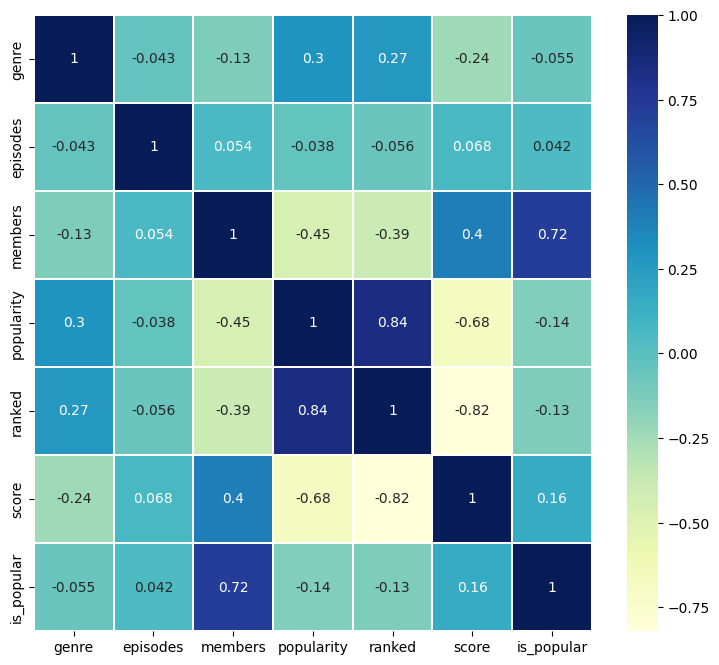

In [16]:
plt.figure(figsize=(9, 8))
sns.heatmap(data=anime.corr(), cmap="YlGnBu", annot=True, linewidths=0.2)

Setelah melihat heatmap, maka kita dapat menentukan data yang kemungkinan besar dapat digunakan untuk train data.

Mari kita coba visualisasikan data pada beberapa nilai positif dan negatif yang kuat.

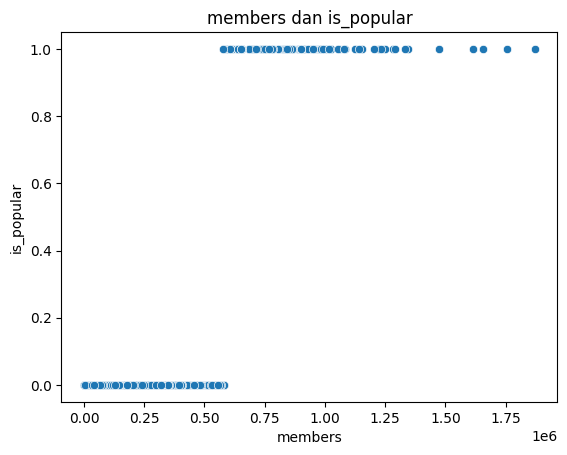

In [17]:
sns.scatterplot(data=anime, x='members', y='is_popular')
plt.title('members dan is_popular')
plt.show()

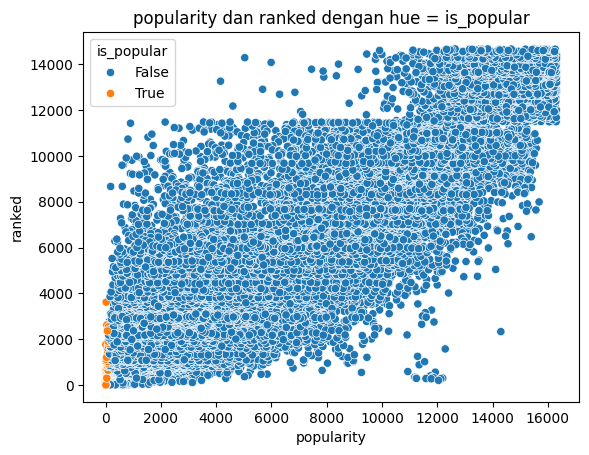

In [18]:
sns.scatterplot(data=anime, x='popularity', y='ranked', hue='is_popular')
plt.title('popularity dan ranked dengan hue = is_popular')
plt.show()

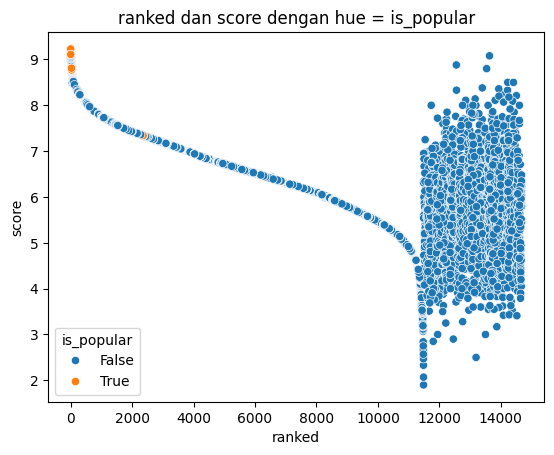

In [19]:
sns.scatterplot(data=anime, x='ranked', y='score', hue='is_popular')
plt.title('ranked dan score dengan hue = is_popular')
plt.show()

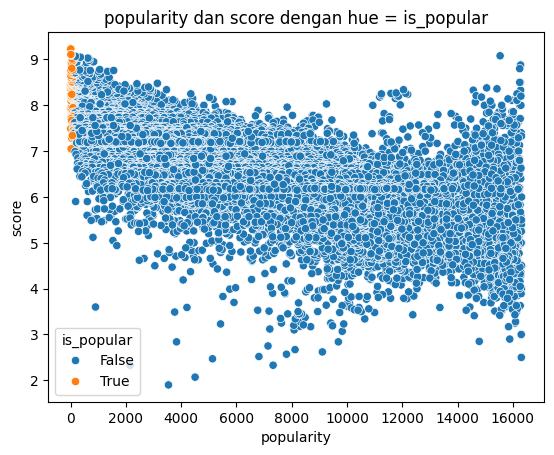

In [20]:
sns.scatterplot(data=anime, x='popularity', y='score', hue='is_popular')
plt.title('popularity dan score dengan hue = is_popular')
plt.show()

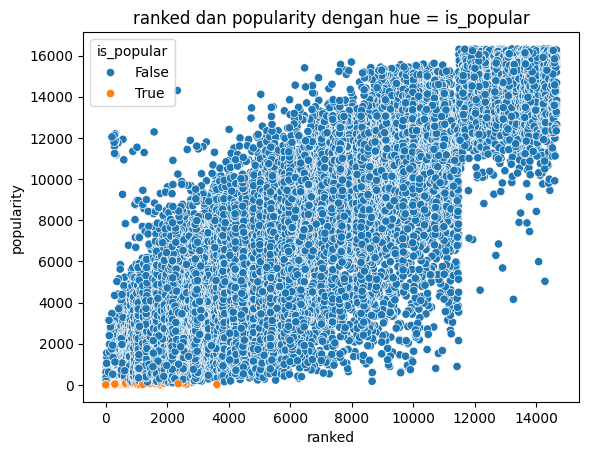

In [21]:
sns.scatterplot(data=anime, x='ranked', y='popularity', hue='is_popular')
plt.title('ranked dan popularity dengan hue = is_popular')
plt.show()

## Hasil Performa Algoritma
-----

Berdasarkan pengamatan pada heatmap dan visualisasi data pada beberapa fitur/kolom, disini akan digunakan genre, episodes, members, dan score sebagai fitur. Sedangkan is_popular akan sebagai label (tema).

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix
import numpy as np

X = anime[['genre', 'episodes', 'members', 'score']]
y = anime['is_popular']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# train Model

x_pred = model.predict(X_train) # prediksi pada data train
cm = confusion_matrix(y_train, x_pred)

# confusion matrix
print(f'Confusion matrix Naive Bayes saat training model:\n {cm} \n')
# Akurasi
print(f'Akurasi pada saat training: {accuracy_score(y_train, x_pred)} \n')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n')

# Predictions and performance metrics
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)

print('Report hasil test model:')
print(report, '\n')

print(f'Confusion matrix Naive Bayes saat test model:\n {cm} \n')
print('Akurasi pada data test: %.3f' %accuracy)
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('F1-score: %.3f' %f1)

Confusion matrix Naive Bayes saat training model:
 [[10816   188]
 [    0    79]] 

Akurasi pada saat training: 0.9830370838220699 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Report hasil test model:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      2751
        True       0.34      1.00      0.51        20

    accuracy                           0.99      2771
   macro avg       0.67      0.99      0.75      2771
weighted avg       1.00      0.99      0.99      2771
 

Confusion matrix Naive Bayes saat test model:
 [[2712   39]
 [   0   20]] 

Akurasi pada data test: 0.986
Precision: 0.339
Recall: 1.000
F1-score: 0.986


Dari perlakuan fitur dan label dengan menggunakan algoritma naive bayes terlihat bahwa disini kami mendapatkan akurasi sebesar 0.986 dengan presisi yang sangat rendah yaitu 0.339. Meskipun demikian kami mendapat nilai recall 1.000 dengan F1-score 0.986.

Kami menyimpulkan bahwa nilai presisi yang rendah disebabkan oleh ketidakseimbangan data, dikarenakan data is_popular yang memiliki nilai true lebih sedikit daripada nilai false (ini terjadi karena kami mengambil 100 anime terpopuler).